<a href="https://colab.research.google.com/github/sejal1910/Mini-project/blob/main/Image_Classification_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install ipython-autotime
%load_ext autotime

time: 213 µs (started: 2021-05-16 16:06:33 +00:00)


In [ ]:
# Gathering of Data using Bing Downloader
# Data : Images
# Categories : cricket bat and apple fruit

In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images

In [3]:
from bing_image_downloader import downloader
downloader.download("cricket bat",limit=30,output_dir='images')



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.sports91.com/wp-content/uploads/2019/04/5b17a6f4ee3028e012227959.jpg
[Error]Invalid image, not saving https://www.sports91.com/wp-content/uploads/2019/04/5b17a6f4ee3028e012227959.jpg

[!] Issue getting: https://www.sports91.com/wp-content/uploads/2019/04/5b17a6f4ee3028e012227959.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #1 from https://blog.playo.co/wp-content/uploads/2017/08/Adidas-Incurza.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://ethlits.com/media/catalog/product/cache/1/image/1200x/999c6c65e255d7531240810e30f61e61/s/g/sg_hp33_english_willow_cricket_bat_size_sh_ethlits.com_3_.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://res-5.cloudinary.com/s247/image/upload/c_pad,dpr_1.0,f_auto,q_auto/media/catalog/product/w/o/woodworm-cricket-ib-select-grade-1-cricket-bat.png
[%] File Downloaded !

[%] Downloading Image #4 from ht

In [4]:
downloader.download("apple fruit",limit=30,output_dir='images')



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://vignette.wikia.nocookie.net/fruits-information/images/2/2b/Apple.jpg/revision/latest?cb=20180802112257
[%] File Downloaded !

[%] Downloading Image #2 from https://www.healthbenefitstimes.com/9/gallery/apple/Apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://jooinn.com/images/red-apple-fruit-1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.theayurveda.org/wp-content/uploads/2015/08/Apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.pexels.com/photos/39803/pexels-photo-39803.jpeg?cs=srgb&amp;dl=apple-fruit-healthy-food-39803.jpg&amp;fm=jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.chhajedgarden.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/0/4/04_apples.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://medilifefood.com/wp-content/uploads/2019/10/pure

In [75]:
# Preprocessing
# 1. Resize
# 2.Flattening

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

target = []
images = []
flat_data = []

datadir = '/content/images'
categories = ['cricket bat','apple fruit']

for category in categories:
  class_num=categories.index(category)    #Label encoding the values
  path=os.path.join(datadir,category)      #Creating path to access all the images
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(70,70))        #Normalizes the values in the range 0 to 1
    img_gray = rgb2gray(img_resized)               #Converting RGB image into grayscale image
    flat_data.append(img_gray.flatten())           
    images.append(img_gray)
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)
    

time: 1min 17s (started: 2021-05-16 18:11:45 +00:00)


In [76]:
len(flat_data[0])

4900

time: 6.16 ms (started: 2021-05-16 18:13:06 +00:00)


In [77]:
70*70

4900

time: 3.84 ms (started: 2021-05-16 18:13:09 +00:00)


In [78]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 5.14 ms (started: 2021-05-16 18:13:16 +00:00)


<BarContainer object of 2 artists>

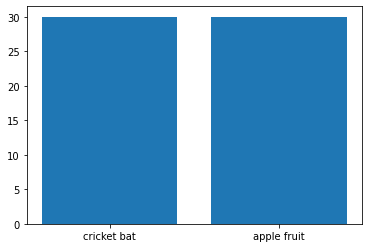

time: 171 ms (started: 2021-05-16 18:13:18 +00:00)


In [79]:
unique,count = np.unique(target,return_counts=True)
plt.bar(categories,count)

In [80]:
# Spliting data into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=109)

time: 10.7 ms (started: 2021-05-16 18:13:24 +00:00)


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid =[
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 2.35 s (started: 2021-05-16 18:13:28 +00:00)


In [82]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0])

time: 15.2 ms (started: 2021-05-16 18:13:39 +00:00)


In [83]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

time: 4.72 ms (started: 2021-05-16 18:13:43 +00:00)


In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 990 µs (started: 2021-05-16 18:13:47 +00:00)


In [85]:
accuracy_score(y_pred,y_test)

0.9444444444444444

time: 3.94 ms (started: 2021-05-16 18:13:50 +00:00)


In [86]:
confusion_matrix(y_pred,y_test)

array([[11,  1],
       [ 0,  6]])

time: 9.89 ms (started: 2021-05-16 18:13:56 +00:00)


In [88]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 6.12 ms (started: 2021-05-16 18:14:13 +00:00)


In [89]:
model = pickle.load(open('img_model.p','rb'))

time: 3.76 ms (started: 2021-05-16 18:14:16 +00:00)


Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGPYG8AseEw5-K6cw-AthdvWZFdtJIoQAxkw&usqp=CAU
(225, 225, 3)
PREDICTED OUTPUT : cricket bat


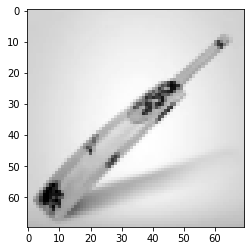

time: 4.73 s (started: 2021-05-16 18:20:57 +00:00)


In [96]:
#Testing a brand new image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(70,70))
img_gray = rgb2gray(img_resized)
flat_data.append(img_gray.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_gray,cmap='gray')
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'PREDICTED OUTPUT : {y_out}')